In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Diwali Sales Data.csv', encoding='unicode_escape')

In [3]:
df.shape

(11251, 15)

There are 11251 rows and 15 columns in this dataset.

In [4]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


As we can see the columns namely `Status` and `unnamed1` are `empty` columns as it has 0 non-null values so we will remove these columns

In [6]:
df.drop(['Status', 'unnamed1'], axis=1, inplace=True)

In [7]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [8]:
df.isnull()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
11246,False,False,False,False,False,False,False,False,False,False,False,False,False
11247,False,False,False,False,False,False,False,False,False,False,False,False,False
11248,False,False,False,False,False,False,False,False,False,False,False,False,False
11249,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

There are 12 null values in the attribute namely `amount`. So we will delete all those rows who have null values.

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [12]:
df[['Age', 'Orders', 'Amount']].describe()

,Age,Orders,Amount
count,11239.000000,11239.000000,11239.000000
mean,35.410357,2.489634,9453.610858
std,12.753866,1.114967,5222.355869
min,12.000000,1.000000,188.000000
25%,27.000000,2.000000,5443.000000
50%,33.000000,2.000000,8109.000000
75%,43.000000,3.000000,12675.000000
max,92.000000,4.000000,23952.000000


## Exploratory Data Analysis

### Gender

In [13]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

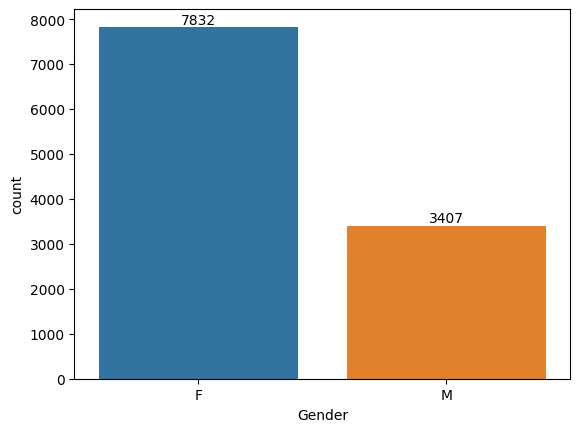

In [15]:
ax = sns.countplot(x = 'Gender', data=df, hue='Gender')

for bars in ax.containers:
    ax.bar_label(bars)

Females have placed more orders than males.

In [16]:
sales_gen = df.groupby(['Gender'], as_index=False)['Amount'].sum().sort_values('Amount', ascending = False)

In [17]:
sales_gen

,Gender,Amount
0,F,74335856.43
1,M,31913276.00


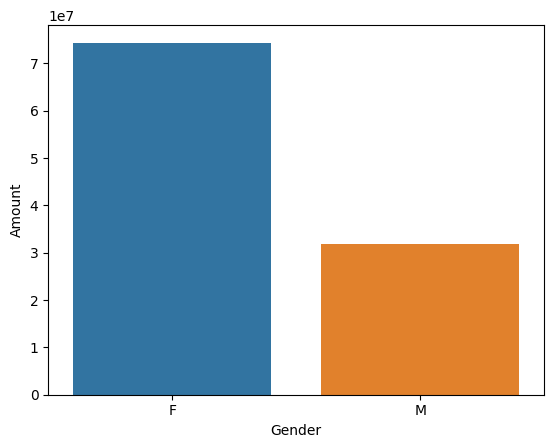

In [18]:
sns.barplot(x='Gender', y='Amount', data = sales_gen, hue='Gender');

Females have spent more amount of money than males.

### Age 

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

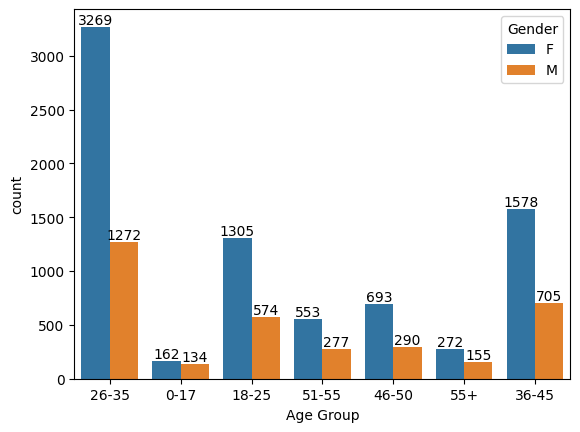

In [20]:
ax = sns.countplot(x='Age Group', hue='Gender', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

Most of the buyers are of the age-group: `26-35 years` and their gender is `female`

In [21]:
sales_age = df.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

In [22]:
sales_age

,Age Group,Amount
2,26-35,42613443.94
3,36-45,22144995.49
1,18-25,17240732.00
4,46-50,9207844.00
5,51-55,8261477.00
6,55+,4080987.00
0,0-17,2699653.00


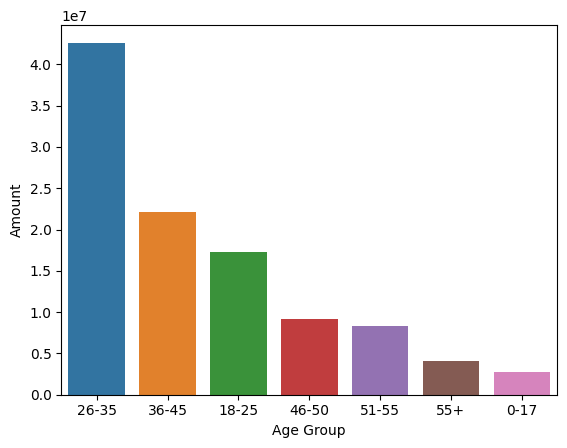

In [23]:
sns.barplot(x='Age Group', y='Amount', data=sales_age, hue='Age Group');

### State

In [24]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

In [25]:
sales_state = df.groupby(['State'], as_index=False)['Orders'].sum().sort_values('Orders', ascending=False).head(10)

In [26]:
sales_state

,State,Orders
14,Uttar Pradesh,4807
10,Maharashtra,3810
7,Karnataka,3240
2,Delhi,2740
9,Madhya Pradesh,2252
0,Andhra Pradesh,2051
5,Himachal Pradesh,1568
8,Kerala,1137
4,Haryana,1109
3,Gujarat,1066


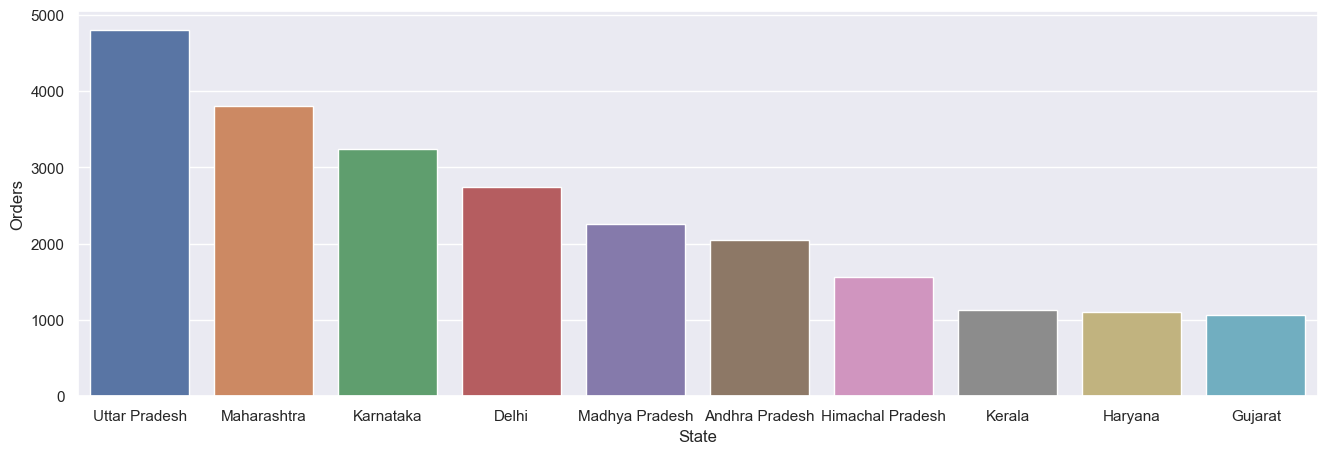

In [27]:
sns.set(rc={'figure.figsize': (16,5)})
sns.barplot(x='State', y='Orders', data=sales_state, hue='State');

UttarPradesh, Maharashtra and karnataka are the top 3 states who have placed most amount of orders.

In [28]:
sales_state = df.groupby(['State'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False).head(10)

In [29]:
sales_state

,State,Amount
14,Uttar Pradesh,19374968.00
10,Maharashtra,14427543.00
7,Karnataka,13523540.00
2,Delhi,11603819.45
9,Madhya Pradesh,8101142.00
0,Andhra Pradesh,8037146.99
5,Himachal Pradesh,4963368.00
4,Haryana,4220175.00
1,Bihar,4022757.00
3,Gujarat,3946082.00


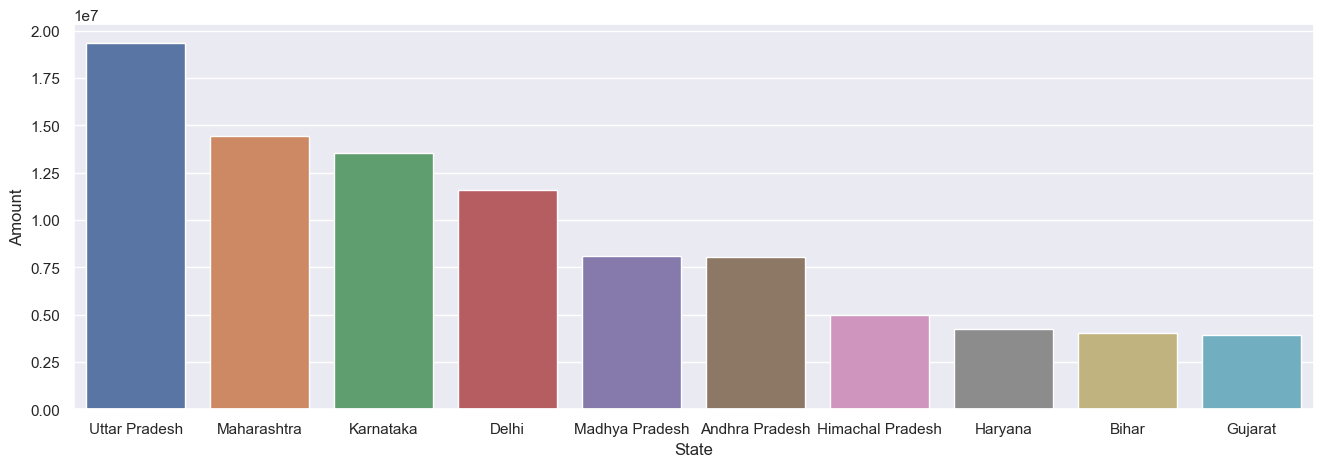

In [30]:
sns.set(rc={'figure.figsize':(16,5)})
sns.barplot(x='State', y='Amount', hue='State', data=sales_state);

UttarPradesh, Maharashtra and karnataka are the top 3 states who have spent the most amount of money.

### Marital Status

In [31]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

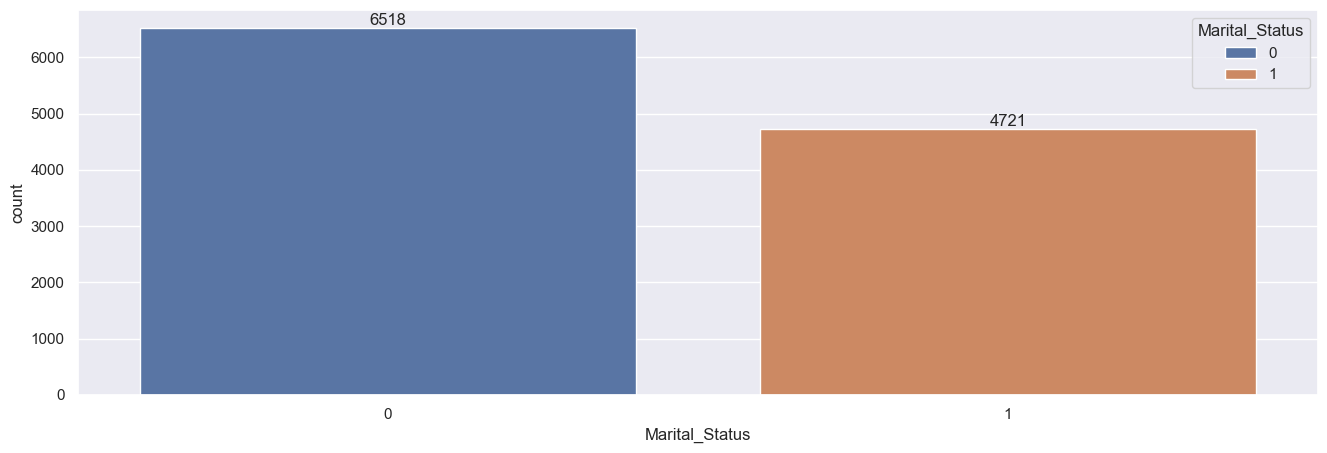

In [32]:
ax = sns.countplot(x='Marital_Status', data=df, hue='Marital_Status');

for bars in ax.containers:
    ax.bar_label(bars)

Unmarried people have bought more products than married people

In [33]:
sales_marital_status = df.groupby(['Marital_Status', 'Gender'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

In [34]:
sales_marital_status

,Marital_Status,Gender,Amount
0,0,F,43786648.44
2,1,F,30549207.99
1,0,M,18338738.00
3,1,M,13574538.00


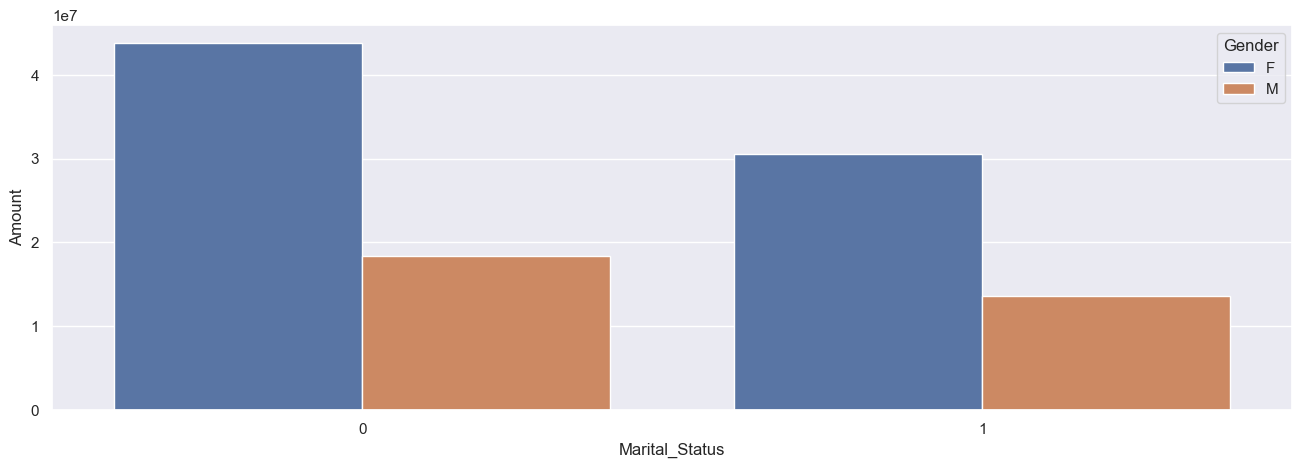

In [35]:
sns.barplot(x='Marital_Status', y='Amount', hue='Gender', data=sales_marital_status);

Unmarried women have spent more amount of money than married women.

### Occupation

In [36]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

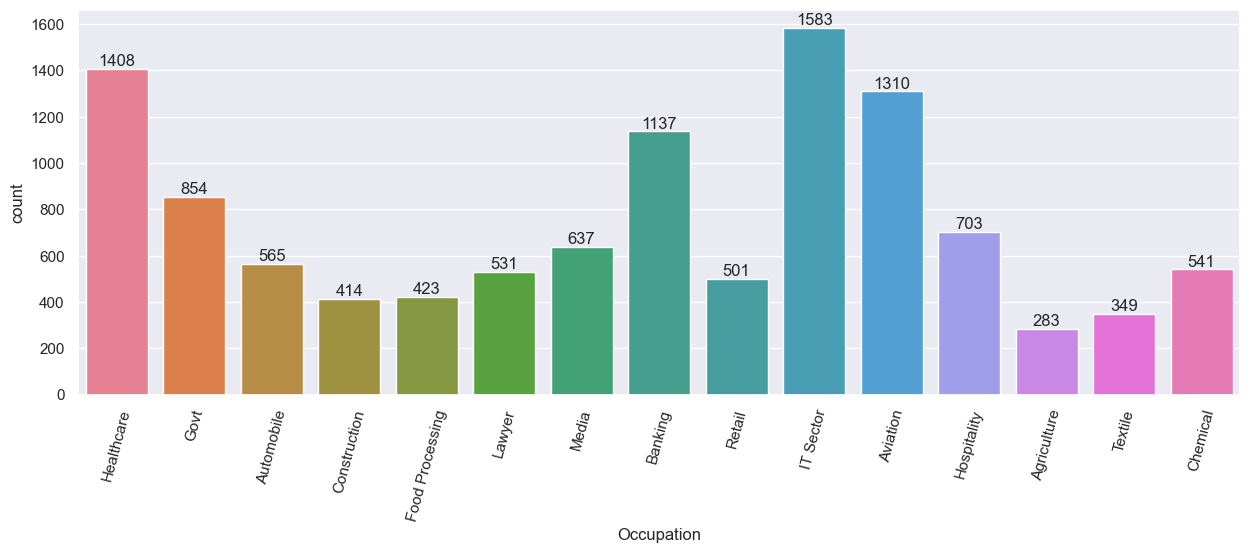

In [39]:
ax = sns.countplot(x='Occupation', data=df, hue='Occupation')
sns.set(rc={'figure.figsize':(15, 5)})
plt.xticks(rotation=75)
for bars in ax.containers:
    ax.bar_label(bars)

The people whose occupation is IT, Aviation, Healthcare and Banking have placed the most amount of orders.

In [40]:
sales_occupation = df.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

In [41]:
sales_occupation

,Occupation,Amount
10,IT Sector,14755079.00
8,Healthcare,13034587.49
2,Aviation,12602298.00
3,Banking,10770610.95
7,Govt,8517212.00
9,Hospitality,6376405.00
12,Media,6295832.99
1,Automobile,5368596.00
4,Chemical,5297436.00
11,Lawyer,4981665.00


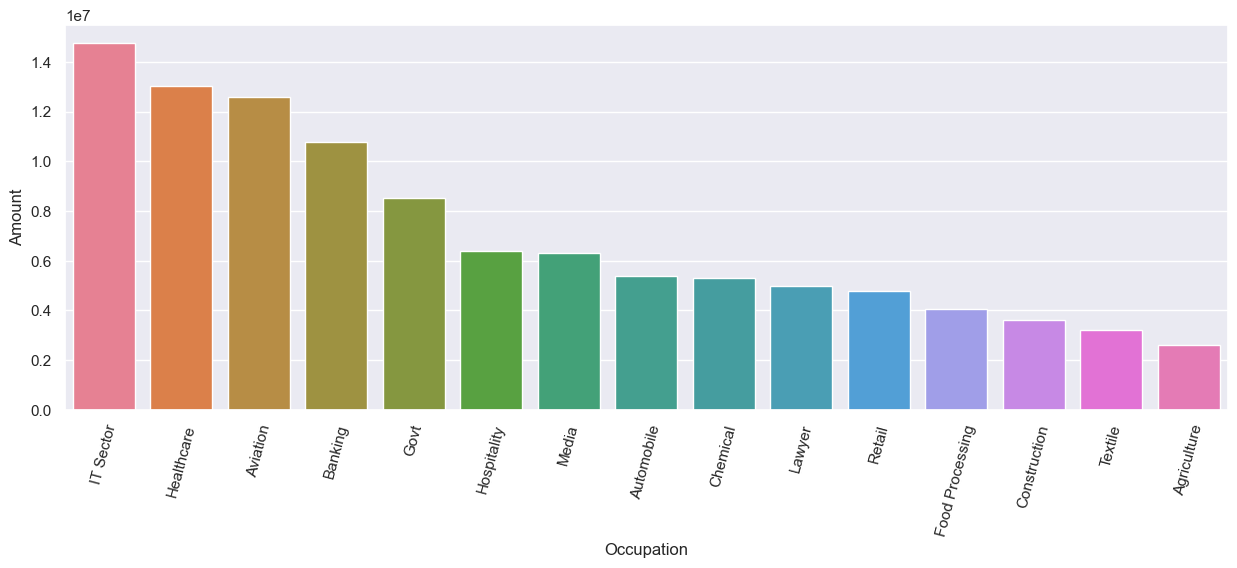

In [43]:
sns.barplot(x='Occupation', y='Amount' , hue='Occupation', data=sales_occupation)
plt.xticks(rotation=75);

The people whose occupation is IT, Aviation, Healthcare and Banking have spent the most amount of money.

### Product Category

In [44]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

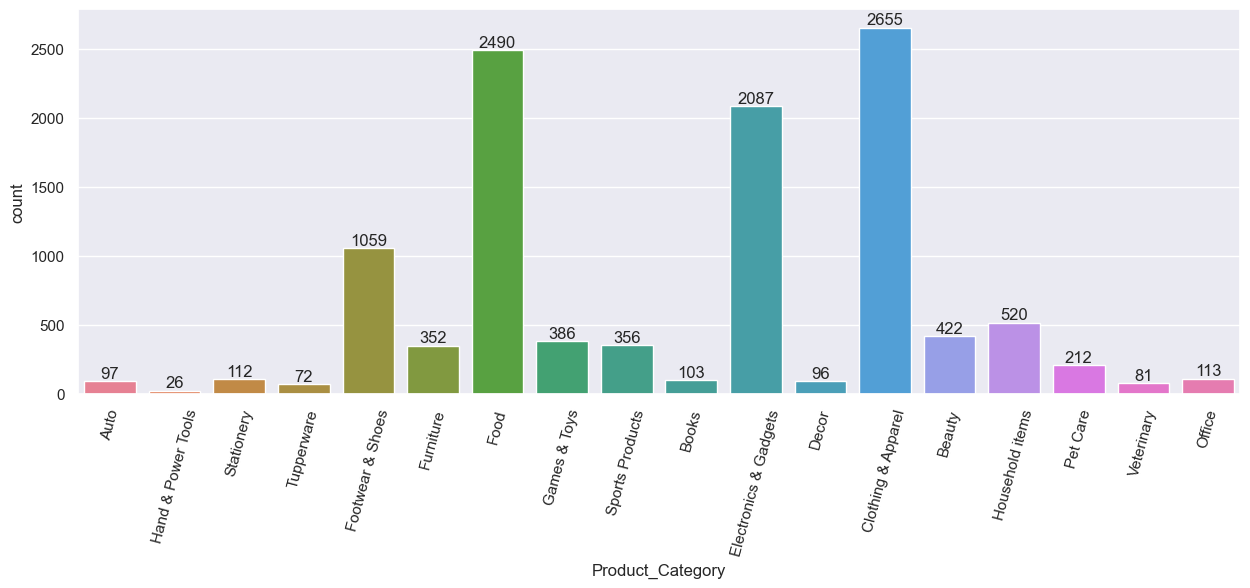

In [45]:
ax = sns.countplot(x='Product_Category', hue='Product_Category', data=df)
plt.xticks(rotation=75)
sns.set(rc={'figure.figsize':(15, 7)})
for bars in ax.containers:
    ax.bar_label(bars)

Product Categories with comparatively high amount of orders placed: Clothing and Apparel, Electronics & Gadgets, Food and Footwear

In [46]:
sales_product_category = df.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values('Amount', ascending=False)

In [47]:
sales_product_category

,Product_Category,Amount
6,Food,33933883.50
3,Clothing & Apparel,16495019.00
5,Electronics & Gadgets,15643846.00
7,Footwear & Shoes,15575209.45
8,Furniture,5440051.99
9,Games & Toys,4331694.00
14,Sports Products,3635933.00
1,Beauty,1959484.00
0,Auto,1958609.99
15,Stationery,1676051.50


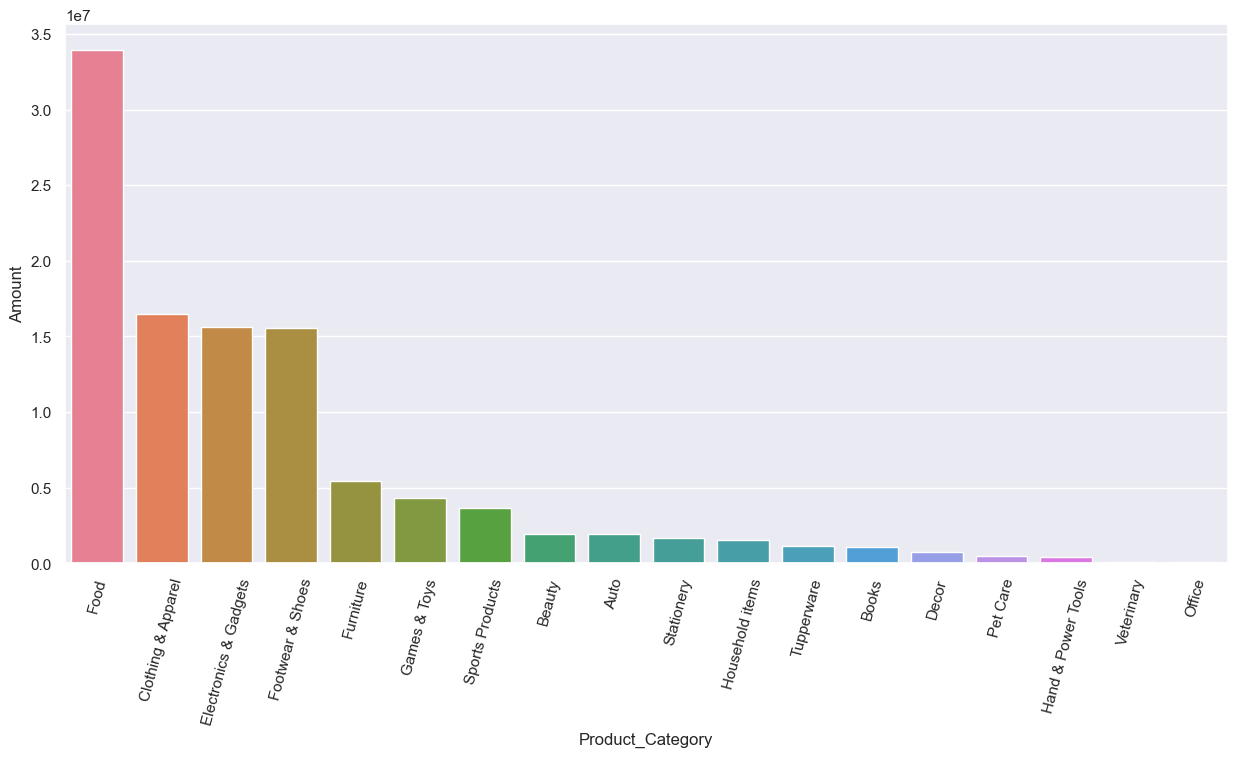

In [48]:
sns.barplot(x='Product_Category', y='Amount', hue='Product_Category', data=sales_product_category)
plt.xticks(rotation=75);

The above graph tells us that the most amount of money has been spent by customers for buying food.

### Top Selling Products

In [49]:
top_selling_products = df.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values('Orders', ascending=False).head(10)

In [50]:
top_selling_products

,Product_ID,Orders
1679,P00265242,127
644,P00110942,116
1504,P00237542,91
1146,P00184942,82
679,P00114942,79
171,P00025442,79
708,P00117942,76
888,P00145042,76
298,P00044442,75
643,P00110842,74


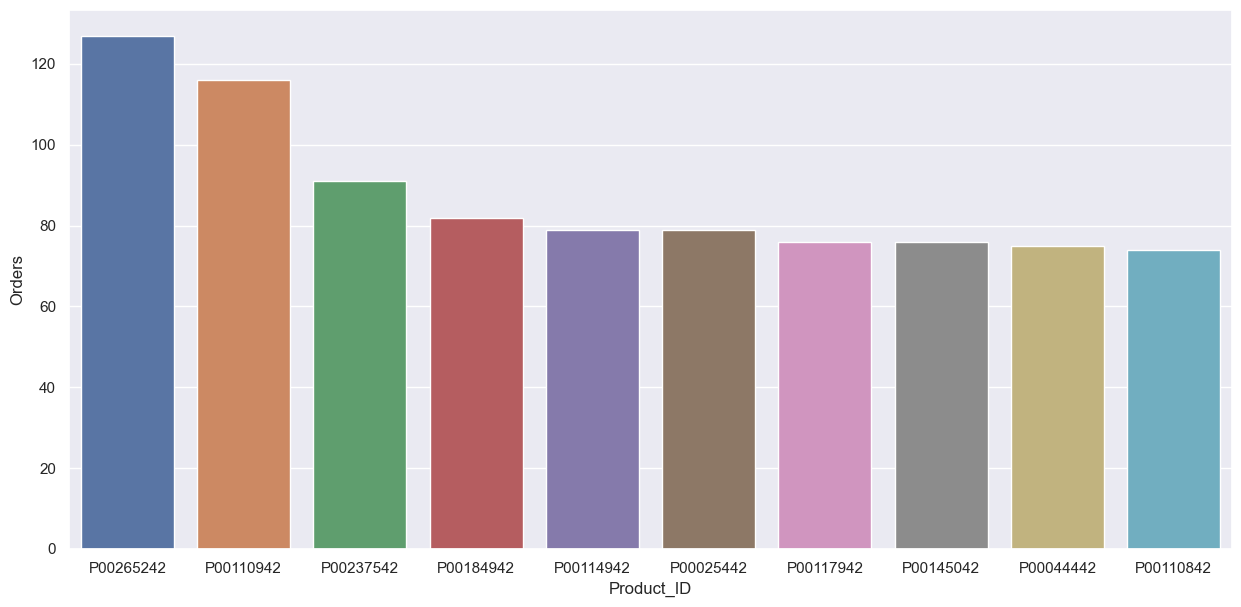

In [51]:
sns.barplot(x='Product_ID', y='Orders', hue='Product_ID', data=top_selling_products);

## Inferences and Conclusion: <br><br>

### Demographic Analysis:
**Gender**: Female shoppers outnumber male shoppers and have demonstrated higher spending. <br>
**Age**: The 26-35 age group, primarily female, constitutes the largest customer segment. <br>

### Geographic Analysis:
**State-wise**: Uttar Pradesh, Maharashtra, and Karnataka emerged as the top three states in terms of both order volume and total expenditure. <br>

### Socio-economic Analysis:
**Marital Status**: Unmarried women exhibited higher purchasing behavior, both in terms of quantity and monetary value. <br>
**Occupation**: Individuals employed in IT, Aviation, Healthcare, and Banking sectors were the primary contributors to both order volume and total expenditure. <br>

### Product Category Analysis:
**Product Category**: Product Categories with comparatively high amount of orders placed: Clothing and Apparel, Electronics & Gadgets, Food and Footwear. Maximum amount of money was spent for buying food. <br>